# Proyecto 2

## Análisis Exploratorio

In [9]:
# Make imports
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
import re
# download word packages
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [10]:
# Lectura del archivo
datos = pd.read_csv('spam-2.csv', encoding='iso-8859-2')
# Get just the columns that has some values
datos = datos[["v1", "v2"]]
# Rename columns
datos = datos.rename(columns={"v1": "category", "v2": "message"})
# Convert to minus letters
datos["message"] = datos["message"].apply(lambda x: x.lower())
# Get the words splitted with the tokenize function
datos["words"] = datos["message"].apply(lambda x: nltk.tokenize.word_tokenize(x))
# Get the amount of words per message
datos["amountWords"] = datos["words"].apply(lambda x: len(x))
datos.head()


,category,message,words,amountWords
0,ham,"go until jurong point, crazy.. available only ...","[go, until, jurong, point, ,, crazy, .., avail...",24
1,ham,ok lar... joking wif u oni...,"[ok, lar, ..., joking, wif, u, oni, ...]",8
2,spam,free entry in 2 a wkly comp to win fa cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...",36
3,ham,u dun say so early hor... u c already then say...,"[u, dun, say, so, early, hor, ..., u, c, alrea...",13
4,ham,"nah i don't think he goes to usf, he lives aro...","[nah, i, do, n't, think, he, goes, to, usf, ,,...",15


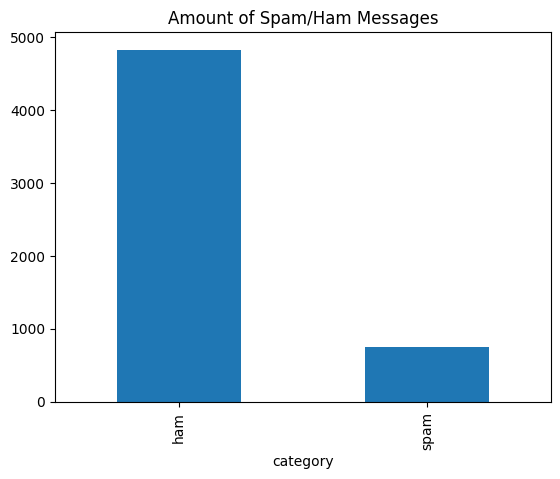

,count,mean,std,min,25%,50%,75%,max
category,,,,,,,,
ham,4825.0,17.255751,13.955467,1.0,8.0,13.0,22.0,216.0
spam,747.0,27.765730,6.826066,2.0,25.0,29.0,32.0,46.0


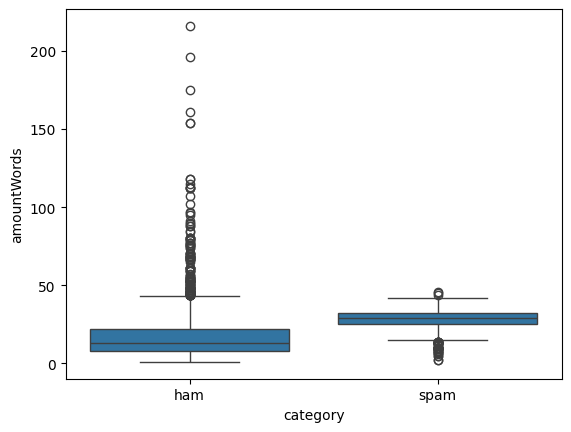

In [11]:
# Amount of ham and spam
datos.groupby(["category"])["category"].count().plot(kind = 'bar')
plt.title("Amount of Spam/Ham Messages")
plt.show()
# plot amount of words by ham or spam
sns.boxplot(x="category", y="amountWords", data=datos)
datos.groupby(["category"])["amountWords"].describe()

## Limpieza de Datos

### Delete tokens with any symbol that is not a character

In [15]:
datos["words"] = datos["words"].apply(lambda x: [word for word in x if not re.search(r'(\W+|_|[0-9])', word)])
datos

,category,message,words,amountWords
0,ham,"go until jurong point, crazy.. available only ...","[go, jurong, point, crazy, available, bugis, n...",24
1,ham,ok lar... joking wif u oni...,"[ok, lar, joking, wif, u, oni]",8
2,spam,free entry in 2 a wkly comp to win fa cup fina...,"[free, entry, wkly, comp, win, fa, cup, final,...",36
3,ham,u dun say so early hor... u c already then say...,"[u, dun, say, early, hor, u, c, already, say]",13
4,ham,"nah i don't think he goes to usf, he lives aro...","[nah, think, goes, usf, lives, around, though]",15
...,...,...,...,...
5567,spam,this is the 2nd time we have tried 2 contact u...,"[time, tried, contact, u, pound, prize, claim,...",35
5568,ham,will ě_ b going to esplanade fr home?,"[b, going, esplanade, fr, home]",9
5569,ham,"pity, * was in mood for that. so...any other s...","[pity, mood, suggestions]",15
5570,ham,the guy did some bitching but i acted like i'd...,"[guy, bitching, acted, like, interested, buyin...",27


### Delete Stop Words

In [16]:
stop = nltk.corpus.stopwords.words('english')
datos["words"] = datos["words"].apply(lambda x: [word for word in x if word not in (stop)])
datos

,category,message,words,amountWords
0,ham,"go until jurong point, crazy.. available only ...","[go, jurong, point, crazy, available, bugis, n...",24
1,ham,ok lar... joking wif u oni...,"[ok, lar, joking, wif, u, oni]",8
2,spam,free entry in 2 a wkly comp to win fa cup fina...,"[free, entry, wkly, comp, win, fa, cup, final,...",36
3,ham,u dun say so early hor... u c already then say...,"[u, dun, say, early, hor, u, c, already, say]",13
4,ham,"nah i don't think he goes to usf, he lives aro...","[nah, think, goes, usf, lives, around, though]",15
...,...,...,...,...
5567,spam,this is the 2nd time we have tried 2 contact u...,"[time, tried, contact, u, pound, prize, claim,...",35
5568,ham,will ě_ b going to esplanade fr home?,"[b, going, esplanade, fr, home]",9
5569,ham,"pity, * was in mood for that. so...any other s...","[pity, mood, suggestions]",15
5570,ham,the guy did some bitching but i acted like i'd...,"[guy, bitching, acted, like, interested, buyin...",27


### Lemmatization

In [17]:
lemmatizer = nltk.stem.WordNetLemmatizer()
datos["words"] = datos["words"].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])
datos

,category,message,words,amountWords
0,ham,"go until jurong point, crazy.. available only ...","[go, jurong, point, crazy, available, bugis, n...",24
1,ham,ok lar... joking wif u oni...,"[ok, lar, joking, wif, u, oni]",8
2,spam,free entry in 2 a wkly comp to win fa cup fina...,"[free, entry, wkly, comp, win, fa, cup, final,...",36
3,ham,u dun say so early hor... u c already then say...,"[u, dun, say, early, hor, u, c, already, say]",13
4,ham,"nah i don't think he goes to usf, he lives aro...","[nah, think, go, usf, life, around, though]",15
...,...,...,...,...
5567,spam,this is the 2nd time we have tried 2 contact u...,"[time, tried, contact, u, pound, prize, claim,...",35
5568,ham,will ě_ b going to esplanade fr home?,"[b, going, esplanade, fr, home]",9
5569,ham,"pity, * was in mood for that. so...any other s...","[pity, mood, suggestion]",15
5570,ham,the guy did some bitching but i acted like i'd...,"[guy, bitching, acted, like, interested, buyin...",27


### Stemming

In [24]:
ps = nltk.stem.PorterStemmer()
datos["words"] = datos["words"].apply(lambda x: [ps.stem(word) for word in x])
datos

,category,message,words,amountWords
0,ham,"go until jurong point, crazy.. available only ...","[go, jurong, point, crazi, avail, bugi, n, gre...",24
1,ham,ok lar... joking wif u oni...,"[ok, lar, joke, wif, u, oni]",8
2,spam,free entry in 2 a wkly comp to win fa cup fina...,"[free, entri, wkli, comp, win, fa, cup, final,...",36
3,ham,u dun say so early hor... u c already then say...,"[u, dun, say, earli, hor, u, c, alreadi, say]",13
4,ham,"nah i don't think he goes to usf, he lives aro...","[nah, think, go, usf, life, around, though]",15
...,...,...,...,...
5567,spam,this is the 2nd time we have tried 2 contact u...,"[time, tri, contact, u, pound, prize, claim, e...",35
5568,ham,will ě_ b going to esplanade fr home?,"[b, go, esplanad, fr, home]",9
5569,ham,"pity, * was in mood for that. so...any other s...","[piti, mood, suggest]",15
5570,ham,the guy did some bitching but i acted like i'd...,"[guy, bitch, act, like, interest, buy, someth,...",27


## Modelo

In [39]:
spamDictionary = {}
hamDictionary = {}
for x in range(0, datos.count()[0]):
    # category
    if (datos.iloc[x].iloc[0]=='ham'):
        # Append 1 in ham dictionary
        for word in datos.iloc[x].iloc[2]:
            if word in list(hamDictionary.keys()):
                hamDictionary[word] += 1
            else:
                hamDictionary[word] = 1 
    else:
        # Append 1 in ham dictionary
        for word in datos.iloc[x].iloc[2]:
            if word in list(spamDictionary.keys()):
                spamDictionary[word] += 1
            else:
                spamDictionary[word] = 1          

/tmp/ipykernel_74593/3823487133.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  for x in range(0, datos.count()[0]):


### Top Words in Spam

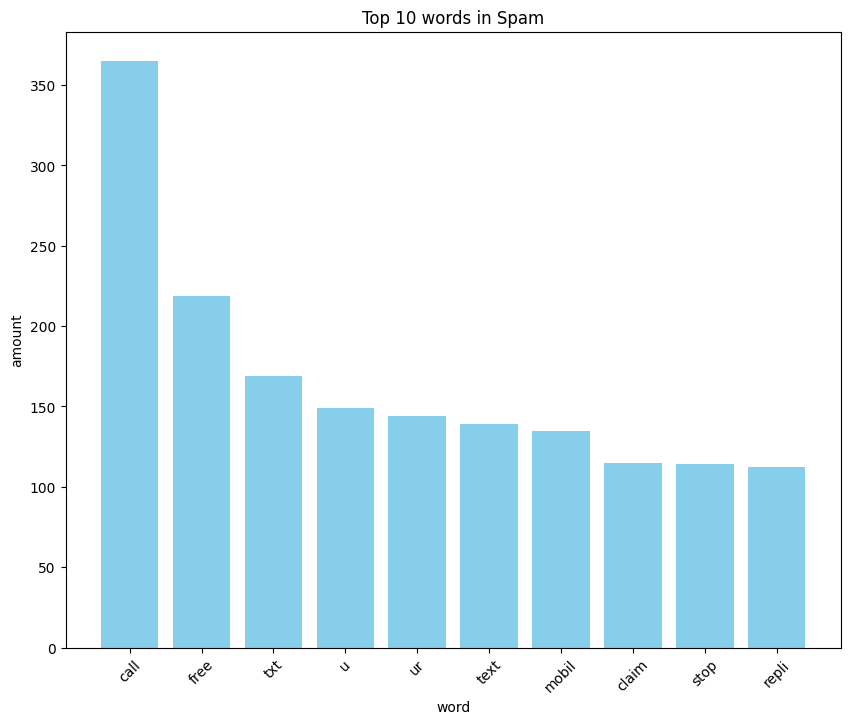

In [43]:
sorted_spam_words = sorted(spamDictionary.items(), key=lambda item: item[1], reverse=True)[:10]
words, counts = zip(*sorted_spam_words)  # Desempaquetar en listas separadas

# Crear la gráfica de barras
plt.figure(figsize=(10, 8))
plt.bar(words, counts, color='skyblue')
plt.title('Top 10 words in Spam')
plt.xlabel('word')
plt.ylabel('amount')
plt.xticks(rotation=45)

# Mostrar la gráfica
plt.show()

### Top Words in Ham

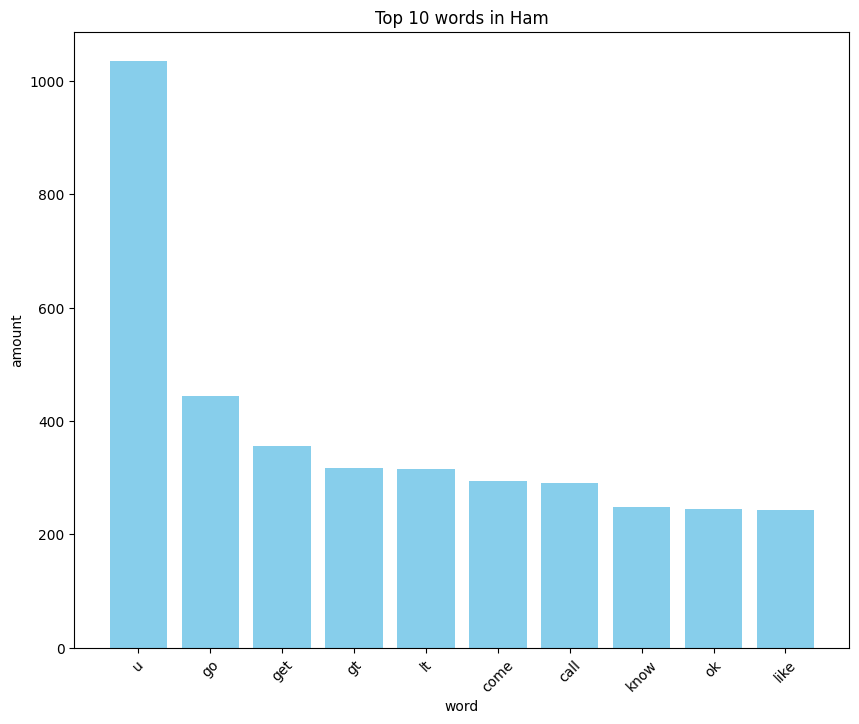

In [41]:
sorted_ham_words = sorted(hamDictionary.items(), key=lambda item: item[1], reverse=True)[:10]
words, counts = zip(*sorted_ham_words)  # Desempaquetar en listas separadas

# Crear la gráfica de barras
plt.figure(figsize=(10, 8))
plt.bar(words, counts, color='skyblue')
plt.title('Top 10 words in Ham')
plt.xlabel('word')
plt.ylabel('amount')
plt.xticks(rotation=45)

# Mostrar la gráfica
plt.show()

## Pruebas de Rendimiento